In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
files.upload()

Saving Company_Data.csv to Company_Data.csv


{'Company_Data.csv': b'Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US\r\n9.5,138,73,11,276,120,Bad,42,17,Yes,Yes\r\n11.22,111,48,16,260,83,Good,65,10,Yes,Yes\r\n10.06,113,35,10,269,80,Medium,59,12,Yes,Yes\r\n7.4,117,100,4,466,97,Medium,55,14,Yes,Yes\r\n4.15,141,64,3,340,128,Bad,38,13,Yes,No\r\n10.81,124,113,13,501,72,Bad,78,16,No,Yes\r\n6.63,115,105,0,45,108,Medium,71,15,Yes,No\r\n11.85,136,81,15,425,120,Good,67,10,Yes,Yes\r\n6.54,132,110,0,108,124,Medium,76,10,No,No\r\n4.69,132,113,0,131,124,Medium,76,17,No,Yes\r\n9.01,121,78,9,150,100,Bad,26,10,No,Yes\r\n11.96,117,94,4,503,94,Good,50,13,Yes,Yes\r\n3.98,122,35,2,393,136,Medium,62,18,Yes,No\r\n10.96,115,28,11,29,86,Good,53,18,Yes,Yes\r\n11.17,107,117,11,148,118,Good,52,18,Yes,Yes\r\n8.71,149,95,5,400,144,Medium,76,18,No,No\r\n7.58,118,32,0,284,110,Good,63,13,Yes,No\r\n12.29,147,74,13,251,131,Good,52,10,Yes,Yes\r\n13.91,110,110,0,408,68,Good,46,17,No,Yes\r\n8.73,129,76,16,58,121,Medium,69,12,Yes,Yes

In [ ]:
#Importing Dataset
dataset = pd.read_csv('Company_Data.csv')


In [ ]:
dataset.head(10)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
dataset.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
dataset[dataset.duplicated(keep=False)]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [ ]:
dataset.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<Axes: >

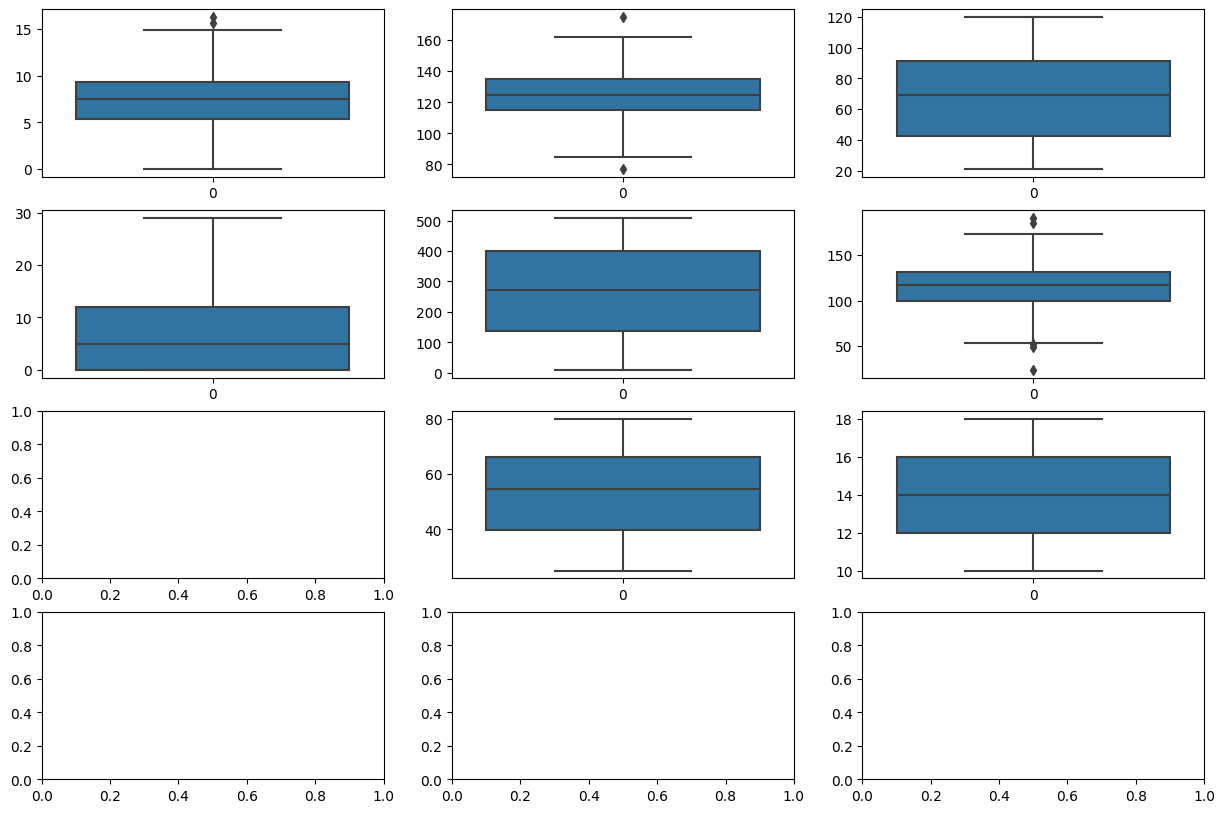

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.boxplot(dataset.Sales, ax=ax[0,0])
sns.boxplot(dataset.CompPrice, ax=ax[0,1])
sns.boxplot(dataset.Income, ax=ax[0,2])
sns.boxplot(dataset.Advertising, ax=ax[1,0])
sns.boxplot(dataset.Population, ax=ax[1,1])
sns.boxplot(dataset.Price, ax=ax[1,2])
sns.boxplot(dataset.Age, ax=ax[2,1])
sns.boxplot(dataset.Education, ax=ax[2,2])

**Take high sales above at 7.49 beacause it is the average of sales**

In [ ]:
dataset["sales"]=(dataset["Sales"]>7.49)*1

**Encodeing Categorical variables**

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['ShelveLoc']= label_encoder.fit_transform(dataset['ShelveLoc'])
dataset['Urban']= label_encoder.fit_transform(dataset['Urban'])
dataset['US']= label_encoder.fit_transform(dataset['US'])

In [ ]:
dataset.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [ ]:
dataset.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093,0.802045
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869,0.035578
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601,0.123460
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460,0.251910
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564,0.069327
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861,-0.392275
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760,0.106962
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652,-0.186707
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250,-0.028847
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085,-0.047090


**Dropping the sales column from the data, since it is the target variable, 'y'**

In [ ]:
dataset.drop(["Sales"],axis=1,inplace=True)

In [ ]:
#Independent and Dependent Variables
X = dataset.iloc[:,0:10].values
y = dataset.iloc[:,10].values

In [ ]:
#Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#Fitting the model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy' ,random_state = 0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predict my test results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[31 15]
 [12 42]]
0.73
